In [8]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import glob
from cycler import cycler

plt.ion()

In [9]:
pd.set_option('display.max_rows', 1000)

In [10]:
for i, fname in enumerate(glob.glob('*.txt')):
    dfn = pd.read_csv(fname, delimiter=' ', header=None, names=['epoch', 'iter','loss', 'lr'])
    dfn['model_id'] = "B" + fname.split('-')[-1][:-4]
    if i > 0:
        df = df.append(dfn)
    else:
        df = dfn
df

,epoch,iter,loss,lr,model_id
0,0,0,7.347816,0.000450,B30
1,0,1,7.306087,0.000450,B30
2,0,2,7.261551,0.000450,B30
3,0,3,7.234505,0.000450,B30
4,0,4,7.201791,0.000450,B30
...,...,...,...,...,...
55295,99,548,4.072293,0.000007,B29
55296,99,549,4.376500,0.000007,B29
55297,99,550,4.221611,0.000007,B29
55298,99,551,4.225892,0.000007,B29


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290556 entries, 0 to 55299
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   epoch     290556 non-null  int64  
 1   iter      290556 non-null  int64  
 2   loss      290556 non-null  float64
 3   lr        290556 non-null  float64
 4   model_id  290556 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
dfm = df.groupby(['model_id', 'epoch']).loss.mean()
dfl = df.groupby(['model_id', 'epoch']).loss.std()
dflr = df.groupby(['model_id', 'epoch']).lr.mean()
dfm = pd.DataFrame({'mean_loss': dfm, 'std_loss': dfl, 'mean_lr': dflr}).reset_index()
dfm

,model_id,epoch,mean_loss,std_loss,mean_lr
0,B16,0,5.428289,0.386285,4.500000e-04
1,B16,1,5.126718,0.077303,4.500000e-04
2,B16,2,5.012941,0.071565,4.500000e-04
3,B16,3,4.962820,0.071692,4.500000e-04
4,B16,4,4.924611,0.079085,4.500000e-04
5,B16,5,4.895057,0.078146,4.500000e-04
6,B16,6,4.869002,0.078780,4.500000e-04
7,B16,7,4.848680,0.078811,4.500000e-04
8,B16,8,4.829261,0.075441,4.500000e-04
9,B16,9,4.813807,0.078212,4.500000e-04


In [6]:
plt.isinteractive()

True

<IPython.core.display.Javascript object>


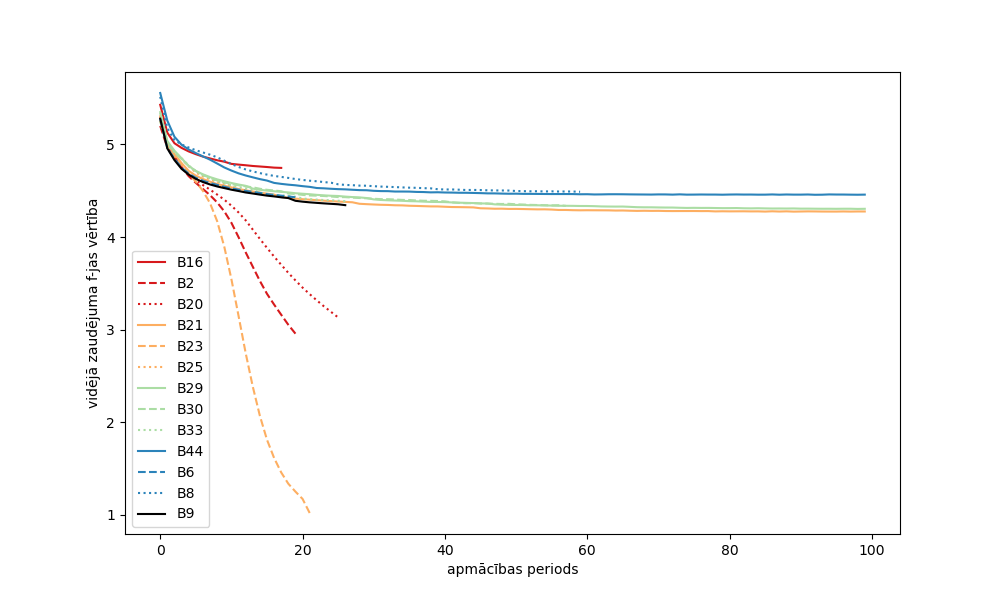

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_prop_cycle(
    cycler('color', ['#d7191c', '#fdae61', '#abdda4', '#2b83ba', 'k']) *
    #cycler('color', ['#8c510a', '#01665e', '#d8b365', '#5ab4ac', '#f6e8c3']) *
    #cycler('alpha', [0.5, 1]) *
    cycler('linestyle', ['-','--',':'])
)

for key, grp in dfm.groupby('model_id'):
    ax = grp.plot(
        ax=ax,
        kind='line',
        x='epoch',
        y='mean_loss',
        label=key,
    )
    
plt.xlabel('apmācības periods')
plt.ylabel('vidējā zaudējuma f-jas vērtība')
plt.show()

In [12]:
plt.close()

<IPython.core.display.Javascript object>


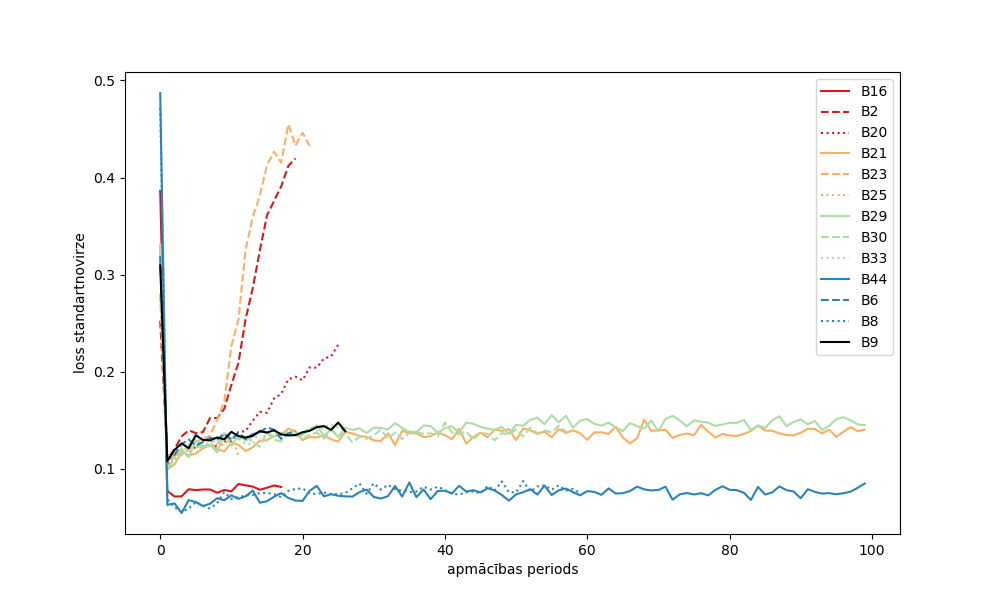

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_prop_cycle(
    cycler('color', ['#d7191c', '#fdae61', '#abdda4', '#2b83ba', 'k']) *
    #cycler('color', ['#8c510a', '#01665e', '#d8b365', '#5ab4ac', '#f6e8c3']) *
    #cycler('alpha', [0.5, 1]) *
    cycler('linestyle', ['-','--',':'])
)

for key, grp in dfm.groupby('model_id'):
    ax = grp.plot(
        ax=ax,
        kind='line',
        x='epoch',
        y='std_loss',
        label=key,
    )
    
plt.xlabel('apmācības periods')
plt.ylabel('loss standartnovirze')
plt.show()